In [256]:
                                                              # PROJECT 8 # 

In [257]:
                                          # Job Market Analysis and Recommendation System #

In [258]:
# importing Important Libraries to Start The Project #

In [259]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression


In [260]:
# Loading Dataset # 

In [261]:
job_mkt = pd.read_csv(r"C:\Users\ACER\Desktop\NEXTHIKES NEW\PROJECT 8\JOBS.csv")

In [262]:
job_mkt


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [263]:
                                       # Data Preprocessing and EDA # 

In [264]:
job_mkt.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [265]:
job_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [266]:
job_mkt.isnull()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,False,False,False,False,True,True,False,True
1,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,True,True,True,False
4,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
244823,False,False,False,False,False,False,True,False
244824,False,False,False,False,True,True,False,False
244825,False,False,False,False,False,False,True,False
244826,False,False,False,False,True,True,False,False


In [267]:
job_mkt.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [268]:
                                             # Fill missing Null values # 

# 1. Fill 'title' and 'link' missing  #
job_mkt['title'] = job_mkt['title'].fillna(method='ffill').fillna(method='bfill')
job_mkt['link'] = job_mkt['link'].fillna(method='ffill').fillna(method='bfill')

# 2. Fill 'country' missing  mode (most frequent country) #
job_mkt['country'] = job_mkt['country'].fillna(job_mkt['country'].mode()[0])


# 3. Fill 'budget' missing #
job_mkt['budget'] = job_mkt['budget'].fillna(job_mkt['budget'].median())

# 4. Fill 'hourly_low' & 'hourly_high' missing #
#  median imputation #
job_mkt['hourly_low'] = job_mkt['hourly_low'].fillna(job_mkt['hourly_low'].median())
job_mkt['hourly_high'] = job_mkt['hourly_high'].fillna(job_mkt['hourly_high'].median())



C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\1545027416.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  job_mkt['title'] = job_mkt['title'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\1545027416.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  job_mkt['link'] = job_mkt['link'].fillna(method='ffill').fillna(method='bfill')


In [269]:
job_mkt.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [270]:
                                              # Normalize Job Titles to Start Task1 #


import re

def normalize_title(title):
    title = title.lower()
    title = re.sub(r'[^\w\s]', '', title)  
    title = title.strip()
    return title

# Apply normalization # 
job_mkt['title'] = job_mkt['title'].apply(normalize_title)

   

In [271]:
# Data Set Columns # 
print(job_mkt.columns)


Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')


In [272]:
#  Convert Data Types #

# Convert budget to numeric # 
job_mkt['budget'] = pd.to_numeric(job_mkt['budget'], errors='coerce')

# Convert published_date to datetime #
job_mkt['published_date'] = pd.to_datetime(job_mkt['published_date'], errors='coerce')


# Drop rows with invalid budget or date #
job_mkt.dropna(subset=['budget', 'published_date'], inplace=True)


#  Remove Budget Outliers #

budget_q1 = job_mkt['budget'].quantile(0.25)
budget_q3 = job_mkt['budget'].quantile(0.75)
iqr = budget_q3 - budget_q1
lower_bound = budget_q1 - 1.5 * iqr
upper_bound = budget_q3 + 1.5 * iqr

job_mkt = job_mkt[(job_mkt['budget'] >= lower_bound) & (job_mkt['budget'] <= upper_bound)]


In [273]:
# Loading Dataset Again  # 

job_mkt 

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
5,seo for portuguese psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,15.0,30.0,100.0,Portugal
7,need portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,True,7.0,22.0,100.0,India
8,looker studio dashboard for leadgen and ecomme...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,True,15.0,30.0,100.0,Germany
...,...,...,...,...,...,...,...,...
244821,experienced recruiter for immediate start,https://www.upwork.com/jobs/Experienced-Recrui...,2024-03-24 13:29:46+00:00,True,15.0,30.0,100.0,United Kingdom
244822,seeking experienced salesperson for engineerin...,https://www.upwork.com/jobs/Seeking-Experience...,2024-03-24 13:24:42+00:00,True,15.0,30.0,100.0,United States
244823,need facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,100.0,Zambia
244824,digitaltelemarketingsalesoutside sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,15.0,30.0,100.0,Sri Lanka


In [274]:
                           #Task 1: Analyze the correlation between job title keywords and offered salaries # 

In [275]:
# calculate the average hourly rate for each job posting #
# Adding New Column Hourly Avg in the Dataset # 


In [276]:
job_mkt['hourly_avg'] = (job_mkt['hourly_high'] + job_mkt['hourly_low']) / 2

C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\3305507743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_mkt['hourly_avg'] = (job_mkt['hourly_high'] + job_mkt['hourly_low']) / 2


In [277]:
job_mkt

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,hourly_avg
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,20.0
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,22.5
5,seo for portuguese psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,15.0,30.0,100.0,Portugal,22.5
7,need portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,True,7.0,22.0,100.0,India,14.5
8,looker studio dashboard for leadgen and ecomme...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,True,15.0,30.0,100.0,Germany,22.5
...,...,...,...,...,...,...,...,...,...
244821,experienced recruiter for immediate start,https://www.upwork.com/jobs/Experienced-Recrui...,2024-03-24 13:29:46+00:00,True,15.0,30.0,100.0,United Kingdom,22.5
244822,seeking experienced salesperson for engineerin...,https://www.upwork.com/jobs/Seeking-Experience...,2024-03-24 13:24:42+00:00,True,15.0,30.0,100.0,United States,22.5
244823,need facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,100.0,Zambia,60.0
244824,digitaltelemarketingsalesoutside sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,15.0,30.0,100.0,Sri Lanka,22.5


In [278]:
# checking Null Values # 

job_mkt.loc[:, 'hourly_avg'] = pd.to_numeric(job_mkt['hourly_avg'], errors='coerce')
print(job_mkt['hourly_avg'].isna().sum()) 


0


In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer  # 
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transform job titles into feature vectors # 
X = vectorizer.fit_transform(job_mkt['title'])

# Target variable #
y = job_mkt['hourly_avg']


In [280]:
# Use Of linear Regression For correlation # 
from sklearn.linear_model import LinearRegression

X = vectorizer.fit_transform(job_mkt['title'])
y = job_mkt['hourly_avg']


In [281]:

model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [282]:
correlation = pd.Series(model.coef_, index=vectorizer.get_feature_names_out())


In [283]:
# Top Positive and Top negative Keywords #
top_positive = correlation.sort_values(ascending=False).head(10)
top_negative = correlation.sort_values().head(10)

print(top_positive)
print(top_negative)


independent       235.579218
attorney           61.279041
lawyer             51.094381
terms              50.025655
display            40.502172
patent             38.906818
money              38.276871
run                37.691201
agreement          35.269177
cryptocurrency     33.243832
dtype: float64
va              -20.853973
paste           -19.998863
caller          -18.577117
customer        -18.210000
assistant       -17.576178
onlyfans        -16.948541
monetize        -14.631793
telemarketing   -14.195584
grow            -14.164072
tok             -14.113520
dtype: float64


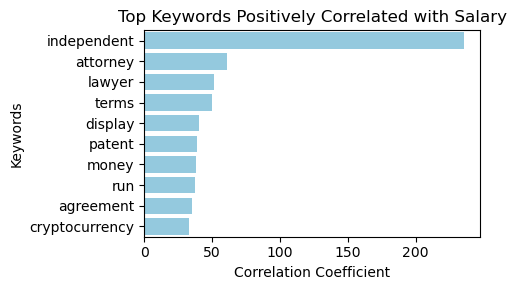

In [284]:
# Plotting Positive Correlation # 
plt.figure(figsize=(5, 3))
sns.barplot(x=top_positive.values, y=top_positive.index, color="skyblue")
plt.title('Top Keywords Positively Correlated with Salary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()



In [285]:
#The plot highlights keywords most positively correlated with higher salaries # 
#Jobs containing these terms—often technical skills or senior roles—tend to offer better compensation#
# Correlation Coefficient Is also Plotted For positive Correlation # 

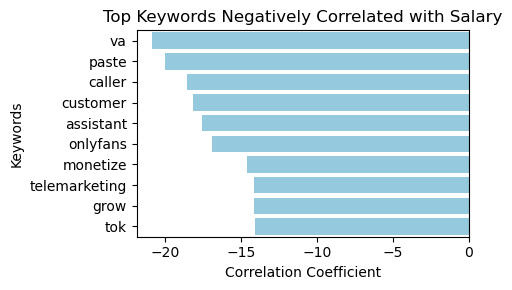

In [286]:
# plotting Negative Correlation # 
plt.figure(figsize=(5, 3))
sns.barplot(x=top_negative.values, y=top_negative.index, color="skyblue")
plt.title('Top Keywords Negatively Correlated with Salary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()

In [287]:
# Bar showing Keywords relationship with  Salary which is negative #
#Correlation Coefficient Is also Plotted For Negative  Correlation # 

In [288]:
                             #Task 2 - Identify emerging job categories based on posting frequency # 

In [289]:

job_mkt = job_mkt.copy()  

# Convert published_date to datetime and drop timezone #
job_mkt['published_date'] = pd.to_datetime(job_mkt['published_date'], errors='coerce')
job_mkt['published_date'] = job_mkt['published_date'].dt.tz_localize(None)

# Extract month as Period #
job_mkt['month'] = job_mkt['published_date'].dt.to_period('M')


In [290]:
# Count postings per category per month #
monthly_counts = job_mkt.groupby(['month', 'title']).size().unstack(fill_value=0)

monthly_counts = monthly_counts.sort_index()

# Preview the matrix #
monthly_counts.tail()

title,0001 wpmn website maintenance for business incorporation company,0002 wpmn website maintenance for wine seller company,02132024 someone to put expenses from bank statements into quickbooks under categories,02292024 admin assistant emails organization travel itineraries,02292024 remote customer service rep,03012024 voice over talent,03042024 admin assistant emails organization travel itineraries,03042024 corporation seeks voice over artist,03042024 onlyfans account management,03102024 onlyfans chatter,...,يحتاج الناطقون باللغة العربية إلى كتابة كتاب باللغة العربيةl,ऑडयबक वचक क आवशयकत seeking audiobook narrator,दरसथ नकर क लए हद वकत य लखa,สมผสรตตกาล sampat ruttikan or known as the untouched,中文 chinese scientific content copywriting for social media posts,中日游戏翻译chinese to japanese game translation,学中文中级水平不需要英语 learning mandarin intermediate level english not necessary,寻找会销售mercado libre cbt账号并提供咨询的人才,我们想找印度尼西亚本地人向目标客户1matahari 2trans retails 总部的相关采购人员 推广我们公司可以交换名片提交catalog,资深中国南方商业战略咨询师 chinasouthern business strategy consulting
month,,,,,,,,,,,,,,,,,,,,,
2023-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-02,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
2024-03,1,1,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,0


In [291]:
# Calculate percentage change month-over-month #
growth_rates = monthly_counts.pct_change().fillna(0)

# Average growth rate per category #
avg_growth = growth_rates.mean().sort_values(ascending=False)

# Top emerging categories #
top_emerging = avg_growth.head(10)
print(top_emerging)

title
0001  wpmn website maintenance for business incorporation company                          inf
presentation slide improvement for a scientific presentation powerpoint or googleslides    inf
presentation refinement                                                                    inf
presentation redesign                                                                      inf
presentation power point                                                                   inf
presentation polishing                                                                     inf
presentation pitch about a luxury watch heritage brand for buyers and investors            inf
presentation on irregular migration a case study of pakistan                               inf
presentation of quran                                                                      inf
presentation maker                                                                         inf
dtype: float64


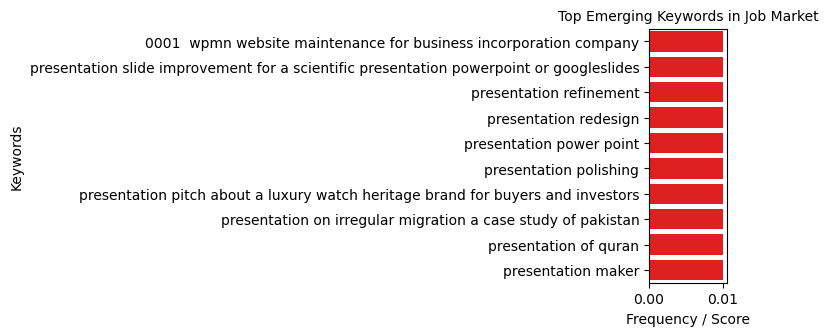

<Figure size 640x480 with 0 Axes>

In [292]:

# Clean series #
top_emerging = top_emerging.replace([np.inf, -np.inf], np.nan).fillna(0)
top_emerging = top_emerging + 0.01

plt.figure(figsize=(8, 4))
sns.barplot(x=top_emerging.values, y=top_emerging.index, color="red")

plt.title("Top Emerging Keywords in Job Market", fontsize=10)
plt.xlabel("Frequency / Score")
plt.ylabel("Keywords")

plt.tight_layout(pad=3)
plt.show()

plt.subplots_adjust(left=0.3) 
plt.show()


In [293]:
print(top_emerging.head())
print(top_emerging.shape)


title
0001  wpmn website maintenance for business incorporation company                          0.01
presentation slide improvement for a scientific presentation powerpoint or googleslides    0.01
presentation refinement                                                                    0.01
presentation redesign                                                                      0.01
presentation power point                                                                   0.01
dtype: float64
(10,)


In [294]:
                        # Task3 - Predict high-demand job roles by analyzing job posting patterns over time # 

In [295]:
job_mkt['month'] = pd.to_datetime(job_mkt['published_date']).dt.to_period('M')

In [296]:
 # Aggregate Job Postings by Role and Month # 

In [297]:
monthly_counts = (
    job_mkt.groupby(['month','title'])
    .size()
    .reset_index(name='count')
)
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

In [298]:
# Forecasting with Prophet (Per Job Role) #

from prophet import Prophet
top_roles = monthly_counts['title'].value_counts().nlargest(5).index

forecasts = {}

for role in top_roles:
    df_role = monthly_counts[monthly_counts['title'] == role][['month', 'count']]
    df_role = df_role.rename(columns={'month': 'ds', 'count': 'y'})

    model = Prophet()
    model.fit(df_role)

    future = model.make_future_dataframe(periods=6, freq='M')
    forecast = model.predict(future)

    forecasts[role] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

17:20:19 - cmdstanpy - INFO - Chain [1] start processing
17:20:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ACER\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:20:19 - cmdstanpy - INFO - Chain [1] start processing
17:20:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ACER\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:20:19 - cmdstanpy - INFO - Chain [1] start processing
17:20:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ACER\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:20:20 - cmdstanpy - INFO - Chain [1] start processing
17:20:20 - cmdstanpy -

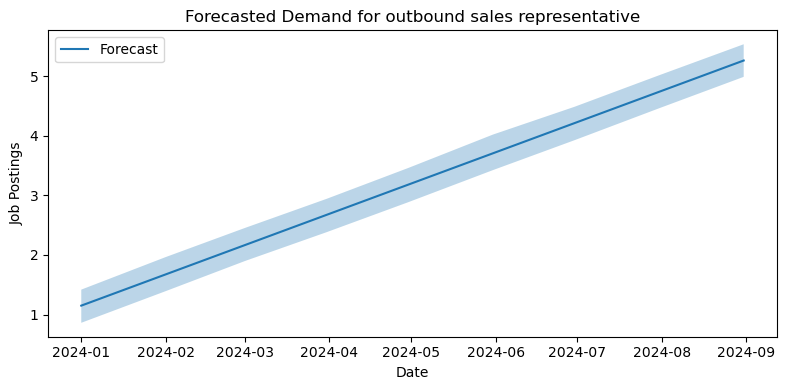

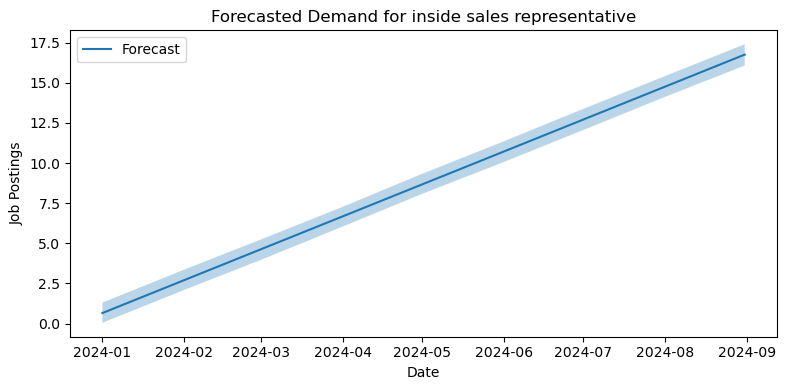

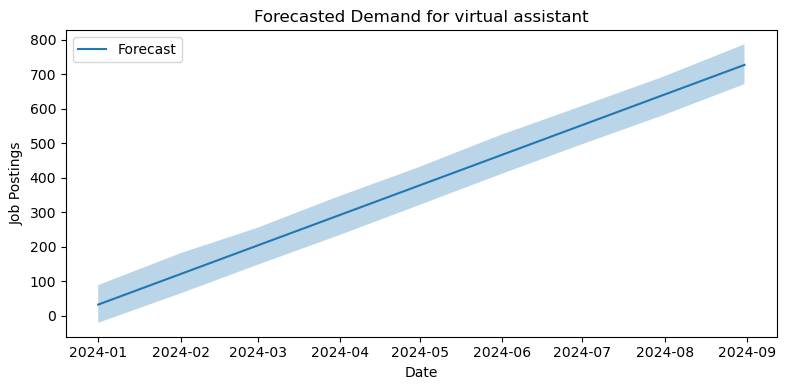

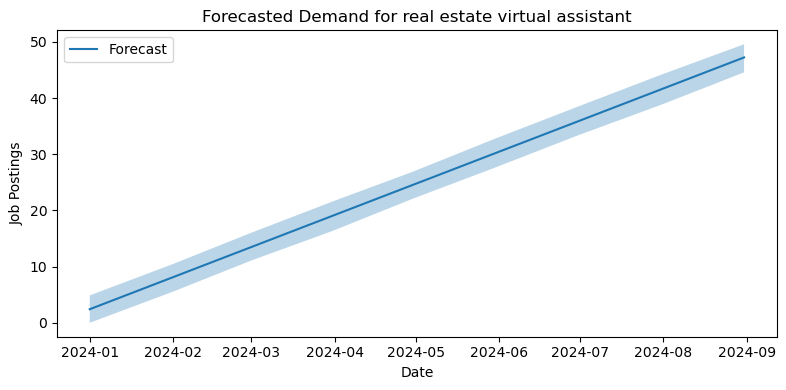

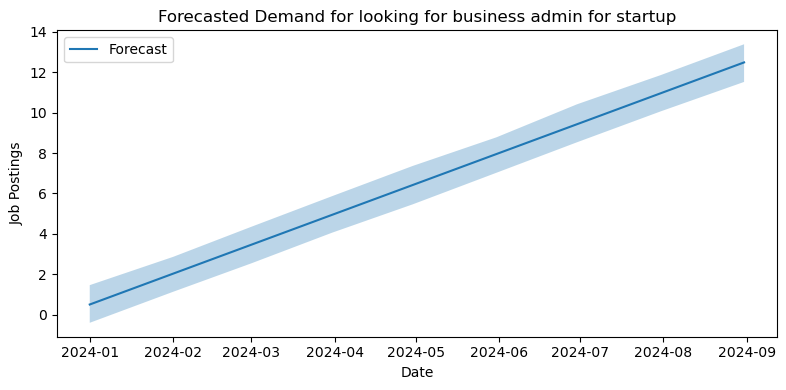

In [299]:

for role, forecast in forecasts.items():
    plt.figure(figsize=(8, 4))
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.3)
    plt.title(f'Forecasted Demand for {role}')
    plt.xlabel('Date')
    plt.ylabel('Job Postings')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [300]:
# To identify high-demand roles#

future_demand = {
    role: forecast['yhat'].tail(6).mean()
    for role, forecast in forecasts.items()
}

high_demand_roles = sorted(future_demand.items(), key=lambda x: x[1], reverse=True)

In [301]:
future_demand

{'outbound sales representative': 3.9608885545402033,
 'inside sales representative': 11.661915555586722,
 'virtual assistant': 507.1043424627772,
 'real estate virtual assistant': 33.069457397589204,
 'looking for business admin for startup': 8.697224466788297}

In [302]:
                          # Task 4 - Compare average hourly rates across different countries #

In [303]:
#   apply normalization #
job_mkt['hourly_usd'] = job_mkt['hourly_avg']
job_mkt['title'] = job_mkt['title'].str.lower().str.strip()

In [304]:
print(job_mkt['hourly_usd'].describe())


count    151307.000000
mean         27.199148
std          24.959215
min           3.000000
25%          17.500000
50%          22.500000
75%          27.500000
max         998.500000
Name: hourly_usd, dtype: float64


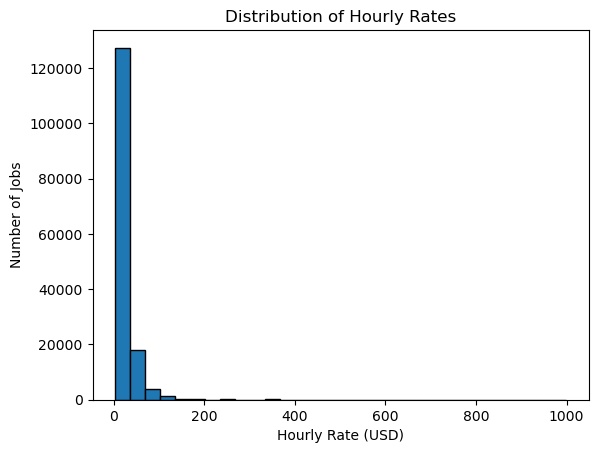

In [305]:

# Distrubution Of hourly Rates # 
import matplotlib.pyplot as plt

plt.hist(job_mkt['hourly_usd'], bins=30, edgecolor='black')
plt.xlabel("Hourly Rate (USD)")
plt.ylabel("Number of Jobs")
plt.title("Distribution of Hourly Rates")
plt.show()


In [306]:
# Average hourly rate by country #
avg_rates = job_mkt.groupby('country')['hourly_usd'].mean().sort_values(ascending=False)


In [307]:
avg_rates

country
Laos                        155.125000
Eritrea                     100.000000
Malawi                       62.250000
Netherlands Antilles         61.250000
Turks and Caicos Islands     46.625000
                               ...    
Brunei Darussalam            14.550000
Aruba                        14.208333
Fiji                         12.500000
Vanuatu                       6.500000
Central African Republic      5.000000
Name: hourly_usd, Length: 202, dtype: float64

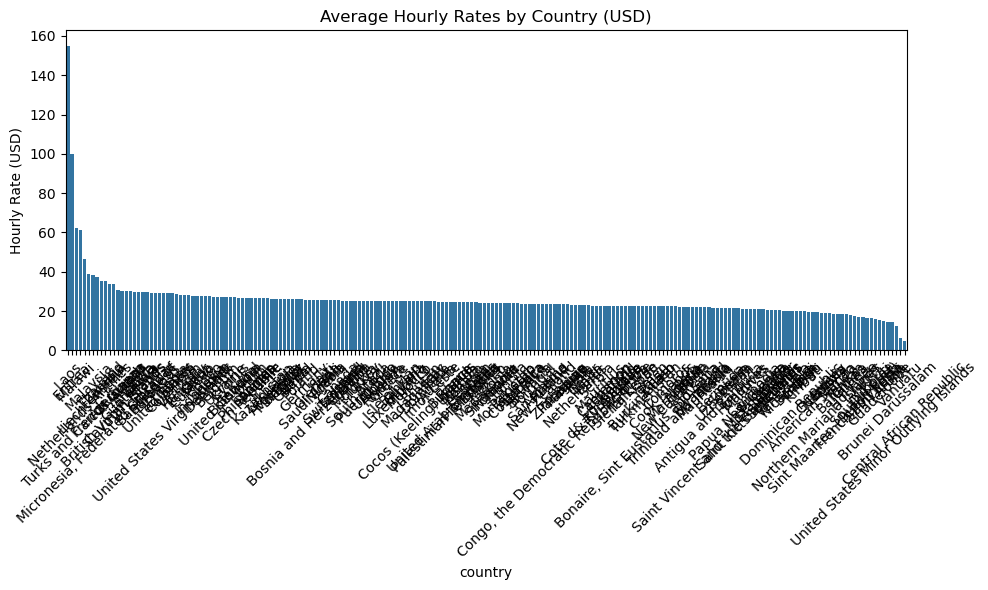

In [308]:
# PLotting #
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rates.index, y=avg_rates.values)
plt.xticks(rotation=45)
plt.title('Average Hourly Rates by Country (USD)')
plt.ylabel('Hourly Rate (USD)')
plt.tight_layout()
plt.show()

In [309]:
                # Task 5 -Create a job recommendation engine based on current job postings #

In [310]:
print(job_mkt.columns)

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'hourly_avg', 'month',
       'hourly_usd'],
      dtype='object')


In [311]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix
import implicit
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors




In [312]:

# Add job_id as a new column #
job_mkt = job_mkt.reset_index().rename(columns={'index': 'job_id'})

In [313]:
job_mkt

,job_id,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,hourly_avg,month,hourly_usd
0,2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46,True,10.0,30.0,100.0,United States,20.0,2024-02,20.0
1,3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08,True,15.0,30.0,100.0,United States,22.5,2024-02,22.5
2,5,seo for portuguese psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41,True,15.0,30.0,100.0,Portugal,22.5,2024-02,22.5
3,7,need portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05,True,7.0,22.0,100.0,India,14.5,2024-02,14.5
4,8,looker studio dashboard for leadgen and ecomme...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24,True,15.0,30.0,100.0,Germany,22.5,2024-02,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...
151302,244821,experienced recruiter for immediate start,https://www.upwork.com/jobs/Experienced-Recrui...,2024-03-24 13:29:46,True,15.0,30.0,100.0,United Kingdom,22.5,2024-03,22.5
151303,244822,seeking experienced salesperson for engineerin...,https://www.upwork.com/jobs/Seeking-Experience...,2024-03-24 13:24:42,True,15.0,30.0,100.0,United States,22.5,2024-03,22.5
151304,244823,need facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38,True,20.0,100.0,100.0,Zambia,60.0,2024-03,60.0
151305,244824,digitaltelemarketingsalesoutside sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52,False,15.0,30.0,100.0,Sri Lanka,22.5,2024-03,22.5


In [314]:
# save upadated Data set As CSv for streamlit #
job_mkt.to_csv(r"C:\Users\ACER\Desktop\NEXTHIKES NEW\PROJECT 8\job_mkt.csv", index=False)


In [315]:
job_mkt.columns

Index(['job_id', 'title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'hourly_avg', 'month',
       'hourly_usd'],
      dtype='object')

In [316]:

# Step 1: TF-IDF on job titles #
tfidf = TfidfVectorizer(stop_words="english", max_features=5000) 
tfidf_matrix = tfidf.fit_transform(job_mkt['title'].fillna(""))


In [317]:
# Step 2: Fit Nearest Neighbors model 
nn_model = NearestNeighbors(n_neighbors=6, metric="cosine", algorithm="brute")
nn_model.fit(tfidf_matrix)



NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [318]:
# Step 3: Recommendation function #
def recommend_jobs(job_id, num_recommendations=5):
    if job_id not in job_mkt['job_id'].values:
        return f"Job ID {job_id} not found."

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(tfidf_matrix[job_id], n_neighbors=num_recommendations+1)

    recommended_ids = indices.flatten()[1:]

    return job_mkt.iloc[recommended_ids][['job_id','title','country','hourly_usd','link']]



In [319]:

print("Original Job Posting:")
print(job_mkt[['job_id','title','country','hourly_usd']].iloc[0])

print("\nRecommended Jobs:")
print(recommend_jobs(job_id=0, num_recommendations=5))


Original Job Posting:
job_id                      2
title         smma bubble app
country         United States
hourly_usd               20.0
Name: 0, dtype: object

Recommended Jobs:
Job ID 0 not found.


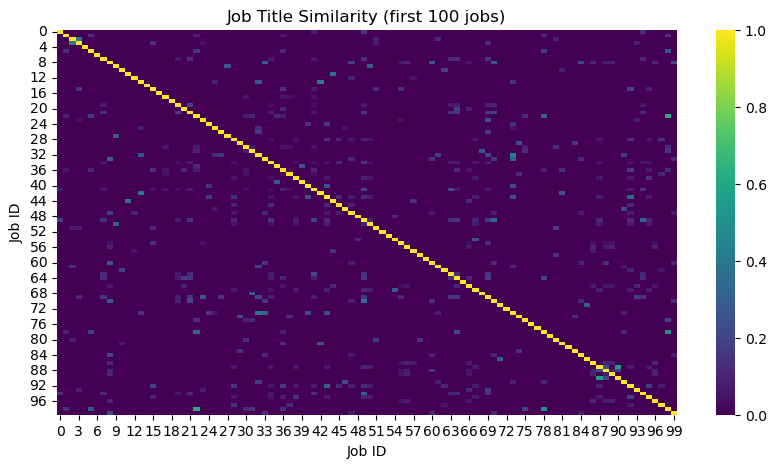

In [320]:
# Ploting Through Heatmap # 

# Compute similarity only for first 100 jobs #
sample_jobs = job_mkt.head(100)
sample_tfidf = tfidf.transform(sample_jobs['title'].fillna(""))

sim_matrix = cosine_similarity(sample_tfidf)

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(sim_matrix, cmap="viridis")
plt.title("Job Title Similarity (first 100 jobs)")
plt.xlabel("Job ID")
plt.ylabel("Job ID")
plt.show()


In [321]:
# Job recommendation API and Streamlit Dashboard For recommendation is In VS code # 
# Also Deployment Done on streamlit # 
# Files Pushed To github # 
# job recommendation file is saved as app2.py #

In [322]:
                               # Task 6: Track changes in job market dynamics over months # 

In [323]:
# A dashboard that updates monthly with new trends is done in vs code #
# Also Deployment Done on streamlit #
# Files Pushed To github #
# Job with monthly trend dashboard  file is save as App.py # 

In [324]:
                               # Task 7: Investigate Trends in the Remote Work Landscape # 

In [325]:

#  published_date to datetime # 
job_mkt['published_date'] = pd.to_datetime(job_mkt['published_date'], errors='coerce')

# Create remote column in dataset # 
job_mkt['remote'] = job_mkt['title'].str.contains(r"\b(remote|work from home|telecommute)\b", case=False, na=False)

# Extract month # 
job_mkt['month'] = job_mkt['published_date'].dt.to_period('M')

# Monthly remote job count # 
monthly_remote = job_mkt[job_mkt['remote']].groupby('month').size()


C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\2886895995.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  job_mkt['remote'] = job_mkt['title'].str.contains(r"\b(remote|work from home|telecommute)\b", case=False, na=False)


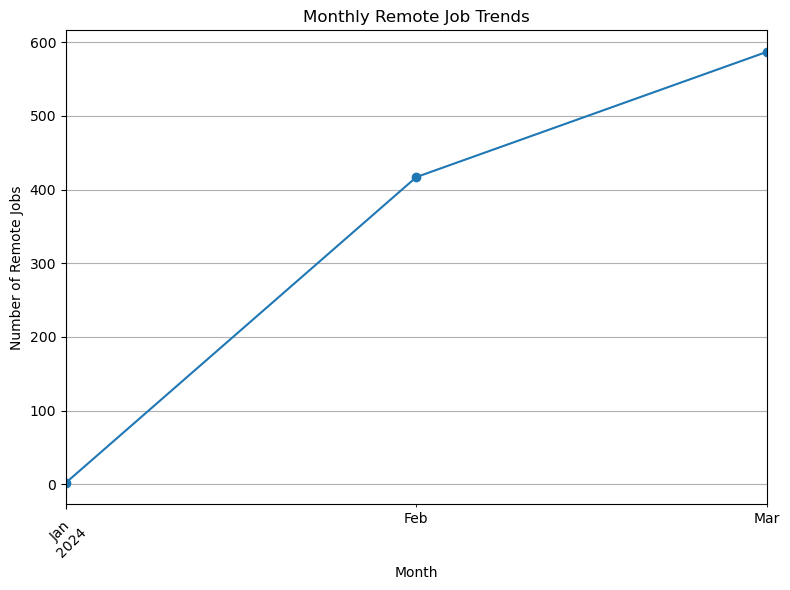

In [326]:

# Plot remote job trends # 
plt.figure(figsize=(8,6))
monthly_remote.plot(marker='o')
plt.title("Monthly Remote Job Trends")
plt.xlabel("Month")
plt.ylabel("Number of Remote Jobs")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [327]:
#  it indicates that remote work is becoming more popular or more employers are posting remote jobs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\604869205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_remote.values, y=country_remote.index, palette='viridis')


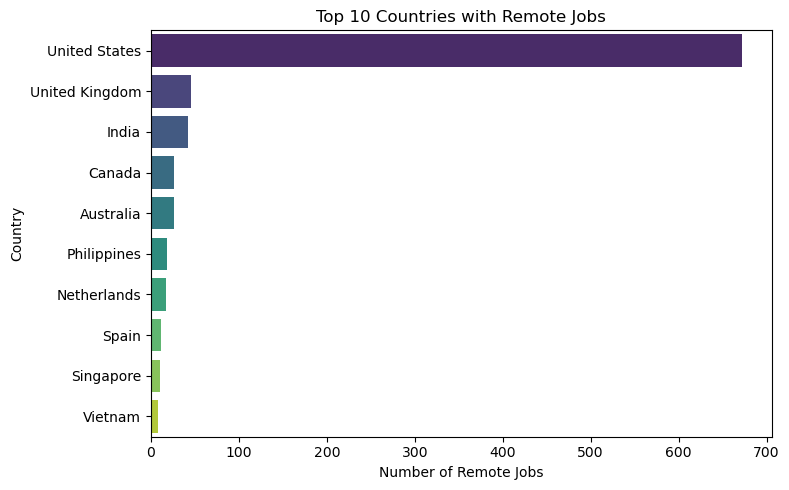

In [328]:
# Country-wise distribution of remote jobs #
country_remote = job_mkt[job_mkt['remote']].groupby('country').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=country_remote.values, y=country_remote.index, palette='viridis')
plt.title("Top 10 Countries with Remote Jobs")
plt.xlabel("Number of Remote Jobs")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [329]:
# US has the most number of remote jobs followed by UK and india .
# countries like spain , sigapore and vietnam has the lowest remote jobs .

In [330]:
                                    #  Task 8: Predict future job market trends #

In [331]:
from prophet import Prophet

# Aggregate total jobs per month # 
monthly_jobs = job_mkt.groupby('month').size().reset_index(name='job_count')
monthly_jobs['month'] = monthly_jobs['month'].dt.to_timestamp()  # Convert period to timestamp

# Prepare for Prophet #
prophet_df = monthly_jobs.rename(columns={'month':'ds', 'job_count':'y'})



In [332]:
# Build and train model # 
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_df)

# Make future dataframe (next 12 months) # 
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)



17:20:37 - cmdstanpy - INFO - Chain [1] start processing
17:20:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ACER\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


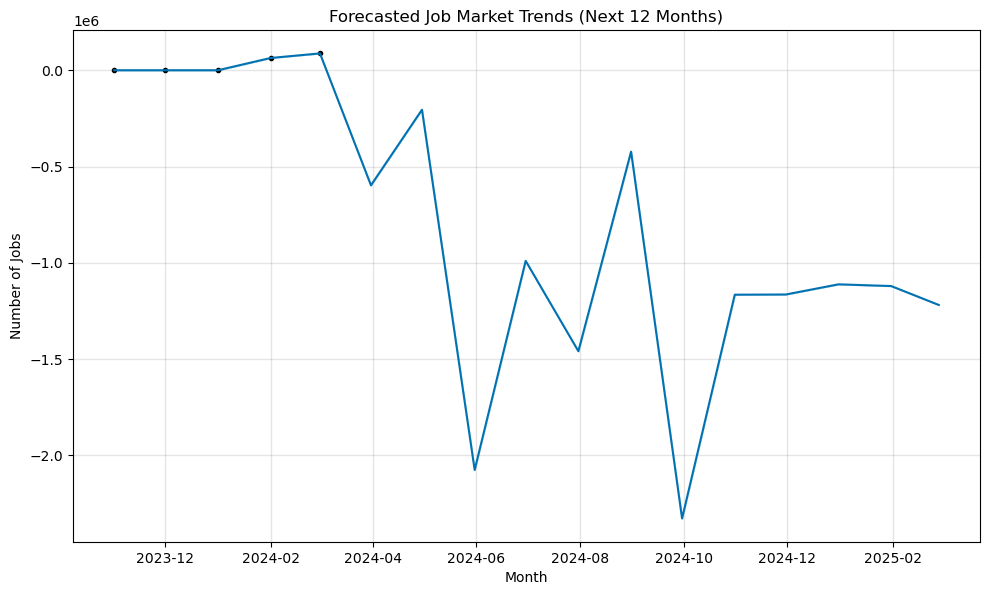

In [333]:
# Plot forecast # 
fig1 = model.plot(forecast)
plt.title("Forecasted Job Market Trends (Next 12 Months)")
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_5392\1865578370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette='magma')


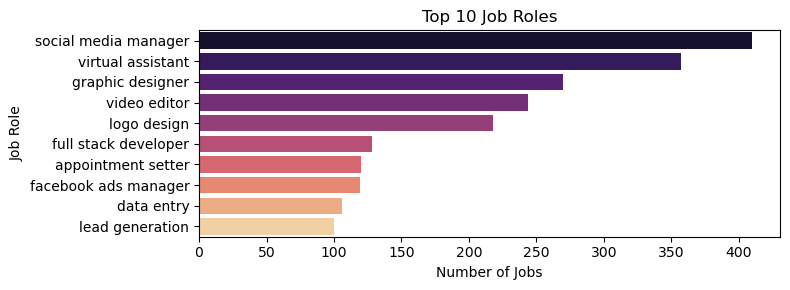

In [334]:

# Top job roles#
top_roles = job_mkt.groupby('title').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,3))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='magma')
plt.title("Top 10 Job Roles")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

In [335]:
# longest bar shows the job role with the highest number of postings, indicating which positions are in highest demand # 
# Comparing the length of bars gives insight into relative demand #
# multiple roles have high demand #
# The chart helps identify emerging or high-demand roles#

In [336]:
 # final Summary Insights Of the Remote Job and Future market trends # 

In [337]:
#⃣ Monthly Remote Job Trends#

#Analysis of remote job postings over time shows the growth and adoption of remote work. 
#An overall increasing trend in remote job postingssuggesting growing adoption of flexible and remote work arrangements.
# Occasional spikes or dips, which may correspond to seasonal hiring patterns, economic factors, 
#or global events affecting the job market.

#This trend demonstrates that remote work is becoming a standard part of the job market#

#⃣ Top Countries for Remote Jobs #
#Countries with the most remote opportunities dominate the global remote work landscape.
# Some regions have significantly fewer postings, indicating unequal adoption of remote work.

#⃣ Top Job Roles #
 #Analysis of the top 10 job roles shows which positions are most in demand#
#total job postings for the next 12 months
#Forecast indicates steady growth in overall job postings, reflecting a robust job market#
#Seasonal patterns and trends from historical data are incorporated, providing realistic expectations for hiring demands#



In [338]:
# project submission link  "https://github.com/hmanmode321/PROJECT8"

# PLS open VS code file using open folder folder path  "C:\Users\ACER\Desktop\NEXTHIKES NEW\PROJECT 8" 